In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip "/content/drive/MyDrive/cheating dataset.zip" -d "/content/drive/MyDrive/student cheating/"

Archive:  /content/drive/MyDrive/cheating dataset.zip
   creating: /content/drive/MyDrive/student cheating/cheating dataset/subject1/
  inflating: /content/drive/MyDrive/student cheating/cheating dataset/subject1/Yousef1.avi  
   creating: /content/drive/MyDrive/student cheating/cheating dataset/subject10/
  inflating: /content/drive/MyDrive/student cheating/cheating dataset/subject10/huangpi21.avi  
   creating: /content/drive/MyDrive/student cheating/cheating dataset/subject11/
  inflating: /content/drive/MyDrive/student cheating/cheating dataset/subject11/alhashe31.avi  
   creating: /content/drive/MyDrive/student cheating/cheating dataset/subject12/
  inflating: /content/drive/MyDrive/student cheating/cheating dataset/subject12/makiluke1.avi  
   creating: /content/drive/MyDrive/student cheating/cheating dataset/subject13/
  inflating: /content/drive/MyDrive/student cheating/cheating dataset/subject13/guolingh1.avi  
   creating: /content/drive/MyDrive/student cheating/cheating dat

In [ ]:
import cv2
import random

# Load video
video = cv2.VideoCapture("/content/drive/MyDrive/student cheating/cheating dataset/subject24/mustaffa1.avi")

# Get video properties
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

# Randomly select 50 frames
frame_indices = random.sample(range(total_frames), 200)

# Loop through each selected frame
for i in frame_indices:
    # Set the frame position
    video.set(cv2.CAP_PROP_POS_FRAMES, i)

    # Read frame
    ret, frame = video.read()
    if not ret:
        break

    # Save frame as an image file
    cv2.imwrite("/content/drive/MyDrive/student_cheating_frames/subject24/frame_{}.jpg".format(i), frame)

# Release video
video.release()


In [ ]:
import cv2
import random

# Load video
video = cv2.VideoCapture("/content/drive/MyDrive/student cheating/cheating dataset/subject24/mustaffa1.avi")

# Get video properties
total_frames = int(video.get(cv2.CAP_PROP_FRAME_COUNT))

# Randomly select 50 frames
frame_indices = random.sample(range(total_frames), 500)

# Loop through each selected frame
for i in frame_indices:
    # Set the frame position
    video.set(cv2.CAP_PROP_POS_FRAMES, i)

    # Read frame
    ret, frame = video.read()
    if not ret:
        break

    # Save frame as an image file
    cv2.imwrite("/content/drive/MyDrive/student_cheating Datastore/cheating/frame_{}.jpg".format(i), frame)

# Release video
video.release()


In [3]:
import numpy as np
import pandas as pd
import os
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, Dense, BatchNormalization, Activation, Dropout, MaxPooling2D, Flatten
from keras.optimizers import Adam, RMSprop, SGD
from keras import regularizers
from keras.callbacks import ModelCheckpoint, CSVLogger, TensorBoard, EarlyStopping, ReduceLROnPlateau
import datetime
import matplotlib.pyplot as plt
from keras.utils import plot_model

In [ ]:

cheating_dataset = '/content/drive/MyDrive/student cheating/cheating dataset/'

row, col = 48, 48
classes = 24

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df

cheating_dataset_ = count_exp(cheating_dataset,'train' )

print(cheating_dataset_)

       subject1  subject10  subject11  subject12  subject13  subject14  \
train         1          1          1          1          1          1   

       subject15  subject16  subject17  subject18  ...  subject22  subject23  \
train          1          1          1          1  ...          1          1   

       subject24  subject3  subject4  subject5  subject6  subject7  subject8  \
train          1         1         1         1         1         1         1   

       subject9  
train         1  

[1 rows x 24 columns]


In [ ]:
cheating_dataset_.transpose()

,train
subject1,1
subject10,1
subject11,1
subject12,1
subject13,1
subject14,1
subject15,1
subject16,1
subject17,1
subject18,1


In [ ]:

train_test = '/content/drive/MyDrive/student_cheating Datastore/'

row, col = 48, 48
classes = 2

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df

train_test_data = count_exp(train_test,'train' )

print(train_test_data)

       cheating  non-cheating
train      9754          2314


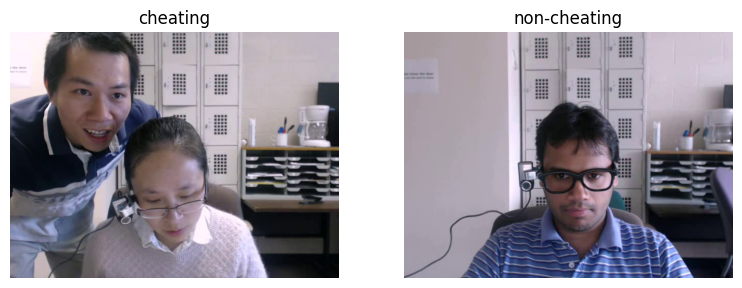

In [ ]:
test_path='/content/drive/MyDrive/train/train/'
plt.figure(figsize=(50,50))
i = 1
for expression in os.listdir(test_path):
    img = load_img((test_path + expression +'/'+ os.listdir(test_path + expression)[19]))
    plt.subplot(1,10,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

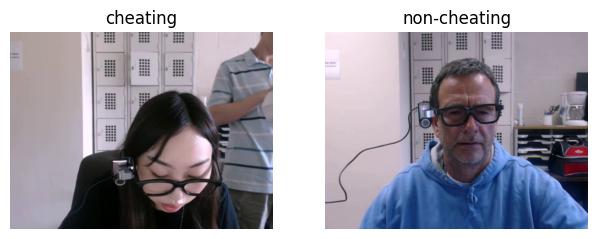

In [ ]:
test_path='/content/drive/MyDrive/train/test/'
plt.figure(figsize=(40,40))
i = 1
for expression in os.listdir(test_path):
    img = load_img((test_path + expression +'/'+ os.listdir(test_path + expression)[12]))
    plt.subplot(1,10,i)
    plt.imshow(img)
    plt.title(expression)
    plt.axis('off')
    i += 1
plt.show()

In [ ]:

dataset_frames = '/content/drive/MyDrive/student_cheating_frames/'

row, col = 48, 48
classes = 24

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df

dataset_frames_subjects = count_exp(dataset_frames,'train' )

print(dataset_frames_subjects)

       subject2  subject3  subject4  subject5  subject6  subject7  subject8  \
train       200       200       200       200       200       200       200   

       subject9  subject10  subject1  
train       200        200       200  


       subject2  subject3  subject4  subject5  subject6  subject7  subject8  \
train       200       200       200       200       200       200       200   

       subject9  subject10  subject1  
train       200        200       200  


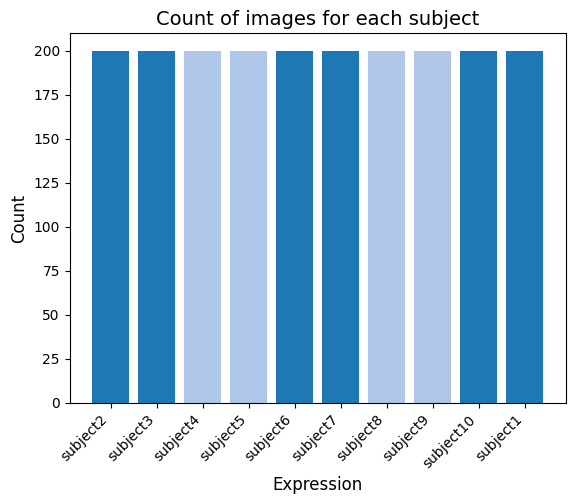

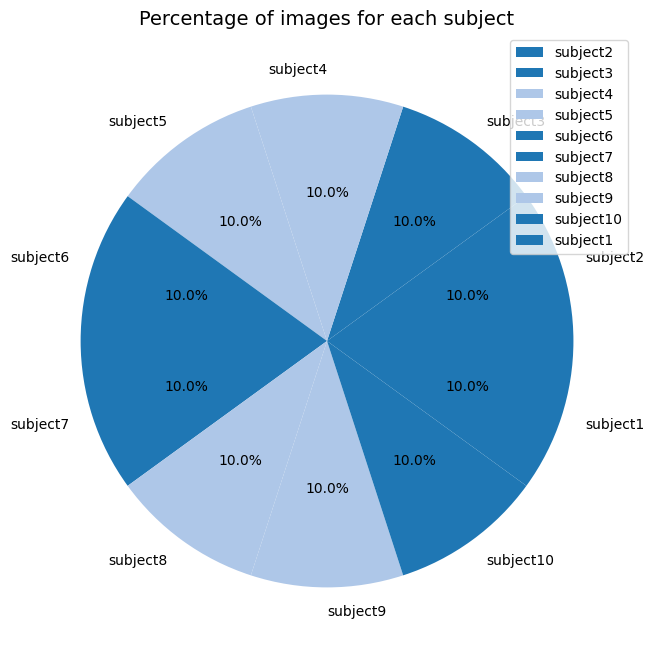

In [ ]:
import matplotlib.pyplot as plt

def plot_count_chart(df, set_):
    fig, ax = plt.subplots()
    ax.bar(df.columns, df.values[0], color=['#1f77b4', '#1f77b4', '#aec7e8', '#aec7e8'])
    ax.set_xlabel('Expression', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'Count of images for each subject', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.show()

def plot_pie_chart(df, set_):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(df.values[0], labels=df.columns, autopct='%1.1f%%', colors=['#1f77b4', '#1f77b4', '#aec7e8', '#aec7e8'])
    ax.set_title(f'Percentage of images for each subject', fontsize=14)
    ax.legend(df.columns, loc="best", fontsize=10)
    plt.show()

student_frames_distribution = count_exp(dataset_frames , 'train')

print(student_frames_distribution)

plot_count_chart(student_frames_distribution, 'train')
plot_pie_chart(student_frames_distribution, 'train')


In [4]:

train = '/content/drive/MyDrive/student cheating Train_test/train/'

row, col = 48, 48
classes = 2

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df

train_data = count_exp(train,'train' )

print(train_data)

       cheating  non-cheating
train      7745          1809


In [5]:

test = '/content/drive/MyDrive/student cheating Train_test/test/'

row, col = 48, 48
classes = 2

def count_exp(path, set_):
    dict_ = {}
    for expression in os.listdir(path):
        dir_ = path + expression
        dict_[expression] = len(os.listdir(dir_))
    df = pd.DataFrame(dict_, index=[set_])
    return df

test_data = count_exp(test,'test' )

print(test_data)

      cheating  non-cheating
test      1939           435


       cheating  non-cheating
train      9754          2314


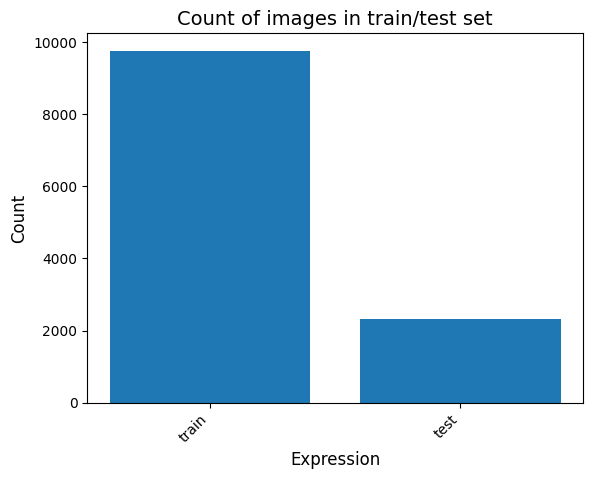

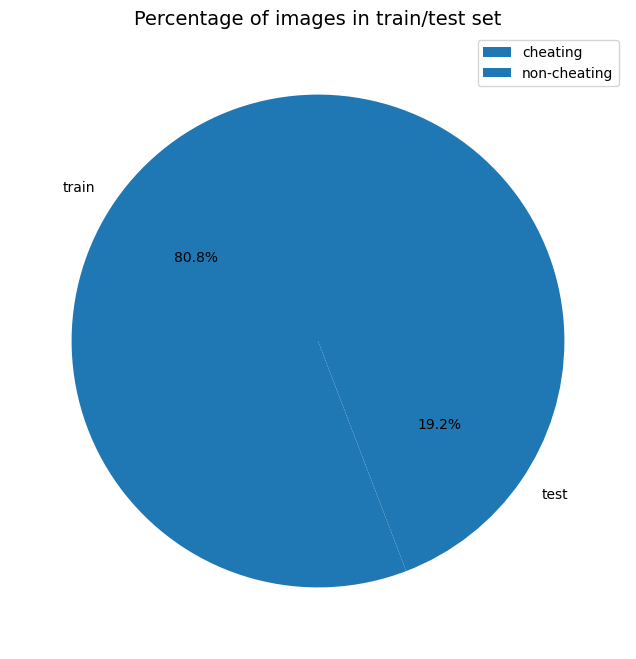

In [ ]:
import matplotlib.pyplot as plt

def plot_count_chart(df, set_):
    fig, ax = plt.subplots()
    ax.bar(['train','test'], df.values[0], color=['#1f77b4', '#1f77b4', '#aec7e8', '#aec7e8'])
    ax.set_xlabel('Expression', fontsize=12)
    ax.set_ylabel('Count', fontsize=12)
    ax.set_title(f'Count of images in train/test set', fontsize=14)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.show()

def plot_pie_chart(df, set_):
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(df.values[0], labels=['train','test'], autopct='%1.1f%%', colors=['#1f77b4', '#1f77b4', '#aec7e8', '#aec7e8'])
    ax.set_title(f'Percentage of images in train/test set', fontsize=14)
    ax.legend(df.columns, loc="best", fontsize=10)
    plt.show()

cheating_train_test_distribution = count_exp(train_test , 'train')

print(cheating_train_test_distribution)

plot_count_chart(cheating_train_test_distribution, 'train')
plot_pie_chart(cheating_train_test_distribution, 'train')


In [ ]:

datapath = '/content/drive/MyDrive/train/'
# Create the training and testing directories
train_dir = os.path.join(datapath, 'train')
test_dir = os.path.join(datapath, 'test')


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255        # fill any gaps created by image transformations with the nearest pixel value
)

training_set = train_datagen.flow_from_directory(train_dir,
                                                batch_size=16,
                                                target_size=(48,48),
                                                color_mode='grayscale',
                                                class_mode='categorical')

test_datagen = ImageDataGenerator(rescale=1./255)

test_set = test_datagen.flow_from_directory(test_dir,
                                                batch_size=16,
                                                target_size=(48,48),
                                                color_mode='grayscale',
                                                class_mode='categorical')

Found 100 images belonging to 2 classes.
Found 40 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential() # model object

# Add Layers
model.add(Conv2D(filters=32, kernel_size=3, strides=1, padding='same', activation='relu', input_shape=[48, 48, 1]))
model.add(MaxPooling2D(2, ))
model.add(Conv2D(filters=64, kernel_size=3, strides=1, padding='same', activation='relu'))
model.add(MaxPooling2D(2))

# Flatten the feature map
model.add(Flatten())

# Add the fully connected layers
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(2048, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

# print the model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 48, 48, 32)        320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 24, 24, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 12, 12, 64)       0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 9216)              0         
                                                                 
 dense_15 (Dense)            (None, 1024)             

In [ ]:
model.compile(optimizer='adam',
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

In [ ]:
history = model.fit(x=training_set,
                 validation_data=test_set,
                 epochs=50)

Epoch 1/50
7/7 [==============================] - 5s 550ms/step - loss: 0.5033 - accuracy: 0.7200 - val_loss: 0.2679 - val_accuracy: 0.9100
Epoch 2/50
7/7 [==============================] - 2s 358ms/step - loss: 0.3102 - accuracy: 0.9400 - val_loss: 0.2456 - val_accuracy: 0.9500
Epoch 3/50
7/7 [==============================] - 2s 345ms/step - loss: 0.2077 - accuracy: 0.9400 - val_loss: 0.1274 - val_accuracy: 0.9600
Epoch 4/50
7/7 [==============================] - 2s 340ms/step - loss: 0.1047 - accuracy: 0.9600 - val_loss: 0.1285 - val_accuracy: 0.9400
Epoch 5/50
7/7 [==============================] - 3s 428ms/step - loss: 0.0754 - accuracy: 0.9600 - val_loss: 0.0300 - val_accuracy: 0.9900
Epoch 6/50
7/7 [==============================] - 3s 429ms/step - loss: 0.0357 - accuracy: 0.9900 - val_loss: 0.0134 - val_accuracy: 1.0000
Epoch 7/50
7/7 [==============================] - 3s 429ms/step - loss: 0.0396 - accuracy: 0.9800 - val_loss: 0.0100 - val_accuracy: 1.0000
Epoch 8/50
7/7 [====

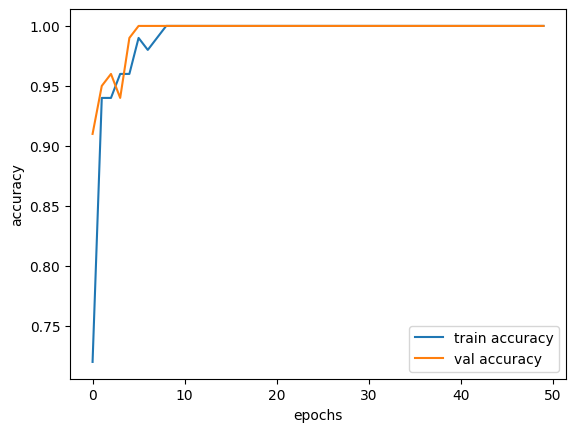

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

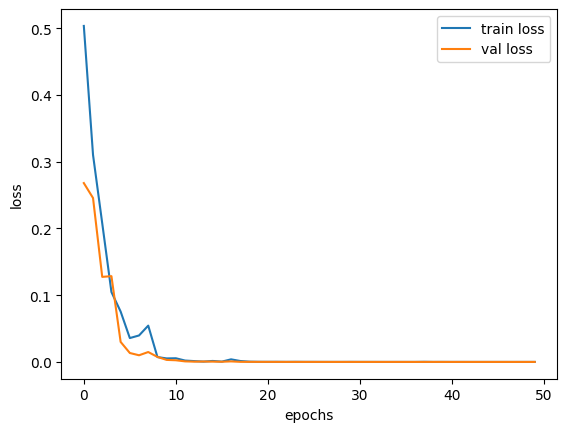

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [ ]:
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
class_labels = test_set.class_indices
class_labels = {v:k for k,v in class_labels.items()}

5/5 [==============================] - 1s 127ms/step


In [ ]:
class_labels

{0: 'cheating', 1: 'non-cheating'}

In [ ]:
y_pred

array([0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1])

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the validation set
y_pred = model.predict(test_set)
y_pred = np.argmax(y_pred, axis=1)
# Calculate evaluation metrics
accuracy = accuracy_score(test_set.classes, y_pred)
precision = precision_score(test_set.classes, y_pred,average = 'micro')
recall = recall_score(test_set.classes, y_pred,average = 'micro')
f1 = f1_score(test_set.classes, y_pred,average = 'micro')

print('Accuracy: {:.2f}'.format(accuracy))
print('Precision: {:.2f}'.format(precision))
print('Recall: {:.2f}'.format(recall))
print('F1-score: {:.2f}'.format(f1))

Accuracy: 0.98
Precision: 0.94
Recall: 0.92
F1-score: 0.97


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns

<Axes: >

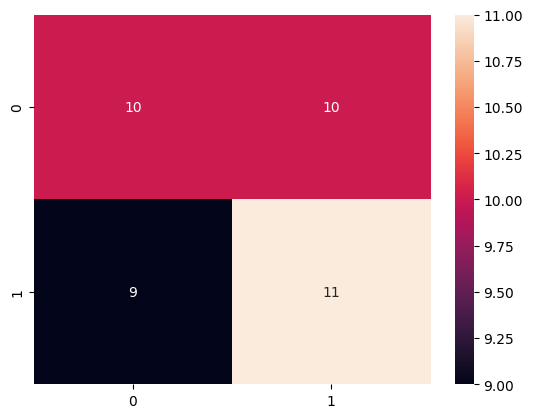

In [ ]:
cm = confusion_matrix(test_set.classes, y_pred)
sns.heatmap(cm, annot=True, fmt="g")

In [ ]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import scikitplot as skplt

<Axes: title={'center': 'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

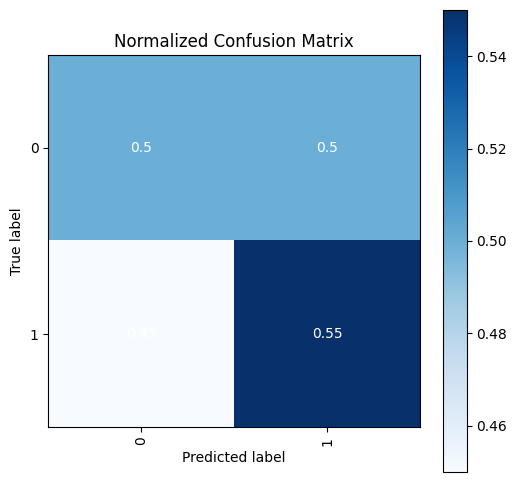

In [ ]:
cm=confusion_matrix(test_set.classes,y_pred)

skplt.metrics.plot_confusion_matrix(test_set.classes,y_pred,normalize=True,x_tick_rotation=90,figsize=(6,6),cmap='Blues')

In [ ]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline


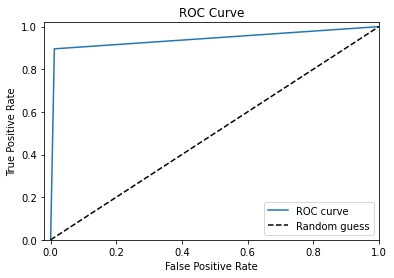

In [ ]:
fpr, tpr, thresholds = roc_curve(training_set.classes, y_pred)

plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.xlim([-0.02, 1])
plt.ylim([0, 1.02])
plt.legend(loc="lower right")